# Tomography reconstruction

In this notebook the last step of the tomographical reconstruction is developed,
starting form the coefficients of the fourier expansion already computed by the 
IDL routines and utilizing the Bessel functions as basis.

Overall this job is done by applying the following formula:

$$
g(r,\theta) = \sum_{m=0}^{\infty}\sum_{l=0}^{\infty}
\left[a_{ml}^{c} \cos(m\theta) + a_{ml}^{s} \sin(m\theta)  \right] J_m(x_{ml}r)
$$

where:

- $g_m^{c,s}(r)$ is the plasma emissivity
- $a_{ml}^{c,s}$ are the coefficients of the expansion
- $J_m$ are the Bessel's functions of $m^{th}$ order
- $x_{ml}$ are the coordinates corresponding to the roots of the bessel functions
- r is the radial coordinate



In [23]:
# Import the needed libraries
import numpy as np
from scipy.special import j0, j1, jn_zeros
import matplotlib.pyplot as plt
from scipy.io import readsav
from tqdm import tqdm


Here the important quantities are defined, such as the orders M and L of the 
expansion and the finesse of the coordinate system.

In [24]:
# Define the main variables
M = 2
L = 7
FINESSE = 100

Below the zeros of the bessel function are taken from the scipy.special library

In [25]:
# Stores the zeros of the bessel function Jml
zeros = np.array([jn_zeros(m, L) for m in range(M)])
# Adds a zero to the zeros of the bessel function Jml
zero = np.zeros(1)
# Concatenate the zeros[1] minus the last element to the array zero
zero = np.concatenate((zero, zeros[1, :-1]))
zeros[1] = zero


In [26]:
print(f'zero m = 0, l = 0 to {L}')
print(zeros[0])
print('\n')
print(f'zero m = 1, l = 0 to {L}')
print(zeros[1])

zero m = 0, l = 0 to 7
[ 2.40482556  5.52007811  8.65372791 11.79153444 14.93091771 18.07106397
 21.21163663]


zero m = 1, l = 0 to 7
[ 0.          3.83170597  7.01558667 10.17346814 13.32369194 16.47063005
 19.61585851]


Here the value of $J_m(x_{ml}r)$ is computed 

In [27]:
# Compute the values of the Bessel functions J0 and J1 at the zeros times the radius
radii = np.linspace(0,1,FINESSE)
J0_xr = np.array([j0(zeros[0]*r) for r in radii])
J1_xr = np.array([j1(zeros[1]*r) for r in radii])

Import the needed data from the RFX shot library

In [28]:
shot = 30929
st = readsav(f'../Data/rfx_{shot}_2.sav', python_dict=False).st
r = st['BRIGHT'][0]["radius"]

# Take the expansion coefficients from the structure
a0cl, a1cl, a1sl = np.split(st["emiss"][0]["coeff"][0][0], 3)

Now compute the 2D emissivity profile!

In [29]:
# Now compute the 2D emissivity profile

theta = np.linspace(0, 2*np.pi, FINESSE)

# Compute the 2D emissivity profile for each value of r and theta
emissivity_profile = []
for t in theta:
  emissivity_profile.append((np.dot(J0_xr, a0cl)) + (np.dot(J1_xr, a1cl)*np.cos(t)) + (np.dot(J1_xr, a1sl)*np.sin(t)))

# Convert the list to a numpy array
emissivity_profile = np.array(emissivity_profile)


emissivity_profile = emissivity_profile.T

## Polar Coordinates

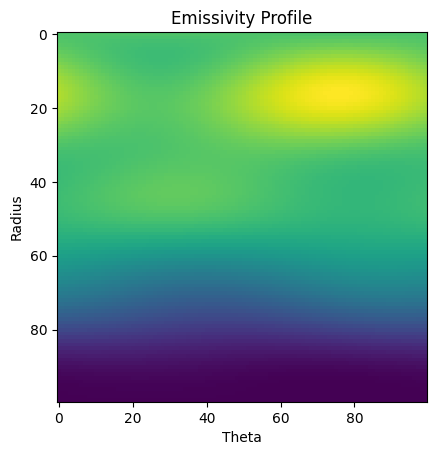

In [30]:
plt.imshow(emissivity_profile)
plt.xlabel('Theta')
plt.ylabel('Radius')
plt.title('Emissivity Profile')

plt.show()

# # I would like to map this image to a 2D grid in cartesian coordinates, keeping the squared pixels, just sorting the values in the right order
# # First, I will create a 2D grid in polar coordinates
# r, t = np.meshgrid(radii, theta)
# # Then, I will convert the polar coordinates to cartesian coordinates
# x = r*np.cos(t)
# y = r*np.sin(t)
# # Now i will sort the values of the emissivity profile in the right order
# # that is the order of the x and y arrays corresponding to the polar coordinates
# # this means finding the values of the polar coordinates mesh grid in the x and y 
# # mesh grid and then sorting the values of the emissivity profile in the same order
# # as the x and y mesh grids
# x = x.flatten()
# y = y.flatten()
# # emissivity_profile_flat = emissivity_profile.flatten()
# # Now I will sort the values of the emissivity profile in the right order
# sorted_emissivity_profile = np.zeros_like(emissivity_profile.flatten())
# emissivity_profile = np.array(emissivity_profile)
# print(enumerate(zip(x, y)))
# for i, (xv, yv) in enumerate(zip(x, y)):
#   if np.where(t == np.arctan2(yv, xv))[0] != []:
#     print(i, xv, yv, np.where(r == np.sqrt(xv**2 + yv**2))[0], np.where(t == np.arctan2(yv, xv))[0])
#   # sorted_emissivity_profile[i] = emissivity_profile[np.where(r == np.sqrt(xv**2 + yv**2))[0], np.where(t == np.arctan2(yv, xv))[0][i%55]]
# # Now I will reshape the sorted values to a 2D grid
# sorted_emissivity_profile = sorted_emissivity_profile.reshape((FINESSE, FINESSE))
# # Now I will plot the sorted emissivity profile
# plt.imshow(sorted_emissivity_profile)

## Cartesian Coordinates

In [31]:
# Plot the emissivity profile in polar coordinates

# # Convert polar coordinates to Cartesian coordinates
# x = np.linspace(0, 1, 110)
# y = np.linspace(0, 1, 110)

# # I would like to map this image to a 2D grid in cartesian coordinates,
# # keeping the squared pixels, just sorting the values in the right order
# # First, I will create a 2D grid in polar coordinates
# r, t = np.meshgrid(radii, theta)
# # Then, I will convert the polar coordinates to cartesian coordinates
# x = r*np.cos(t)
# y = r*np.sin(t)
# # Now I will sort the values of the emissivity profile in the right order
# # that is the order of the x and y arrays corresponding to the polar coordinates
# # this means finding the values of the polar coordinates mesh grid in the x and y
# # mesh grid and then sorting the values of the emissivity profile in the same order
# # as the x and y mesh grids
# x = x.flatten()
# y = y.flatten()
# emissivity_profile_array = np.array(emissivity_profile)
# # Now I will sort the values of the emissivity profile in the right order
# sorted_emissivity_profile = np.zeros_like(emissivity_profile.flatten())
# for i, (xv, yv) in tqdm(enumerate(zip(x, y))):
#   if (np.where(r == np.sqrt(xv**2 + yv**2))[0].size == 0) or (np.where(t == np.arctan2(yv, xv))[0].size == 0):
#     sorted_emissivity_profile[i] = -1
#   else:
#     sorted_emissivity_profile[i] = emissivity_profile_array[np.where(r == np.sqrt(xv**2 + yv**2))[0][i%360], np.where(t == np.arctan2(yv, xv))[0][i%360]]
# # Now I will reshape the sorted values to a 2D grid
# sorted_emissivity_profile = sorted_emissivity_profile.reshape((FINESSE, FINESSE))
# # Now I will plot the sorted emissivity profile
# plt.imshow(sorted_emissivity_profile)
# plt.xlabel('Theta')
# plt.ylabel('Radius')
# plt.title('Emissivity Profile')
# plt.show()


Here we plot the two diameters at 0 and 90 degrees

(100, 100)


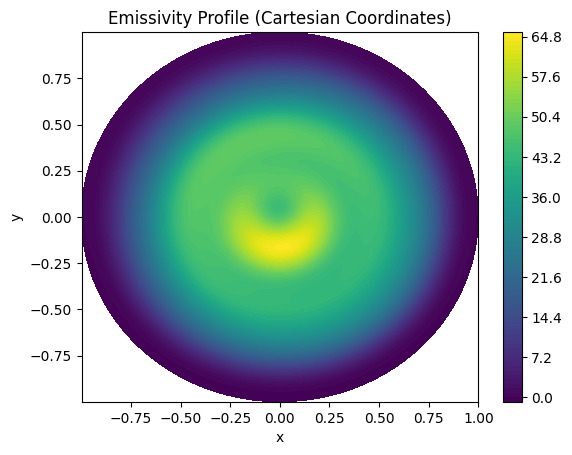

In [95]:

# Convert polar coordinates to Cartesian coordinates
x = np.outer(radii, np.cos(theta))
y = np.outer(radii, np.sin(theta))

# Reshape the emissivity profile matrix to match the Cartesian coordinates
emissivity_profile_cartesian = np.reshape(emissivity_profile, (len(radii), len(theta)))
print(emissivity_profile_cartesian.shape)
# Plot the emissivity profile in Cartesian coordinates
# plt.imshow(emissivity_profile_cartesian, aspect='auto')
# plt.pcolormesh(x, y, emissivity_profile_cartesian)
# plt.contourf(x, y, emissivity_profile_cartesian, 100)
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Emissivity Profile (Cartesian Coordinates)')
plt.show()

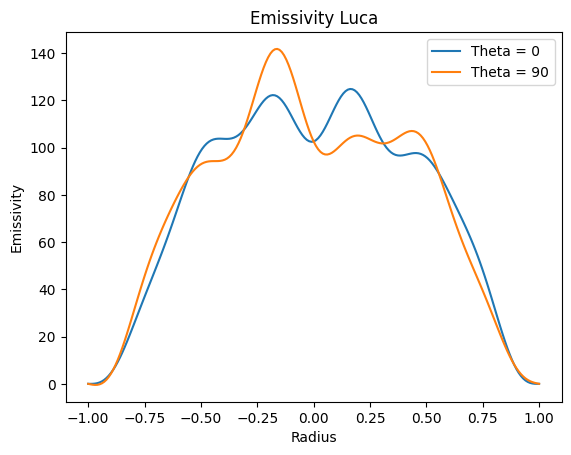

(100,)
124.84732615557222
141.81657732735664


In [33]:
emissivity_profile_norm = emissivity_profile/r
plt.plot(radii, emissivity_profile_norm[:, 0], label='Theta = 0', color='#1f77b4')
plt.plot(-radii, emissivity_profile_norm[:, int(FINESSE/2)], color='#1f77b4')
plt.plot(radii, emissivity_profile_norm[:, int(FINESSE/4)], label='Theta = 90', color='#ff7f0e')
plt.plot(-radii, emissivity_profile_norm[:, int(FINESSE*3/4)], color='#ff7f0e')
plt.legend()
plt.title('Emissivity Luca')
plt.xlabel('Radius')
plt.ylabel('Emissivity')
plt.show()
print(emissivity_profile[:, 0].shape)
# rosso = np.concatenate(emissivity_profile[:, 40][::-1], emissivity_profile[:, 0])

print(np.max(emissivity_profile_norm[:, 0]))
print(np.max(emissivity_profile_norm[:, int(FINESSE*3/4)]))

0.459
(110,)
141.83673
123.61079


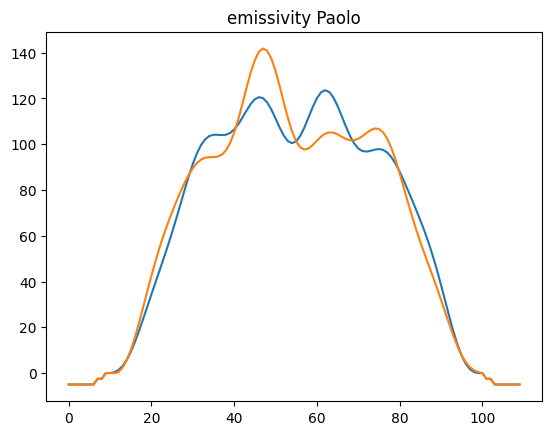

In [34]:
from scipy.io import readsav

data = readsav('../Data/rfx_30929_2.sav', python_dict=False)
r = data['st']['bright'][0]['radius'][0]
print(r)
dst_e = data['st_e']
plt.title('emissivity Paolo')
plt.plot(dst_e.EMISS[0][0,55,:])
plt.plot(dst_e.EMISS[0][0,:,55])
print(dst_e.EMISS[0][0,55,:].shape)

print(np.max(dst_e.EMISS[0][0,:,55]))
print(np.max(dst_e.EMISS[0][0,55,:]))

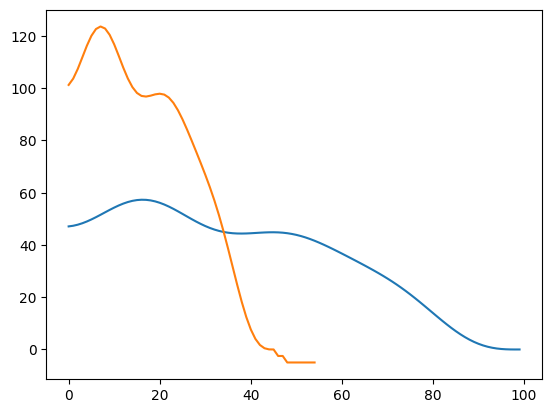

In [35]:
plt.plot(emissivity_profile[:, 0]) # theta = 0
plt.plot(dst_e.EMISS[0][0,55,:][55:])

In [36]:
assert False

AssertionError: 

In [ ]:
print(radii.shape)
print(theta.shape)

(100,)
(100,)


(110, 110)


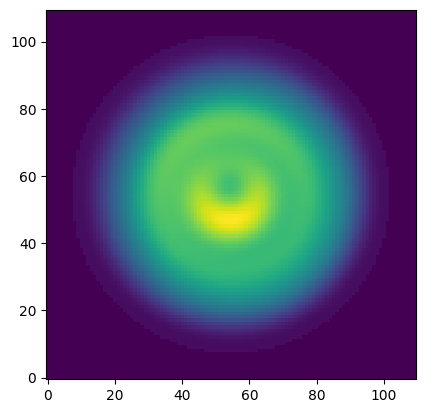

123.51270682653663
141.74223773403168


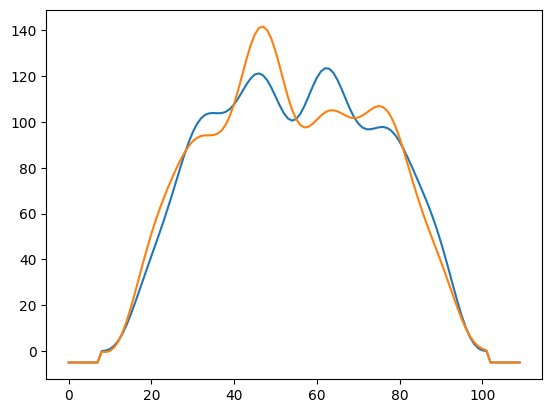

In [85]:
import numpy as np

# Auxiliary function to map polar data to a cartesian plane
def polar_to_cart(polar_data, theta_step, range_step, x, y, order=1):

    from scipy.ndimage import map_coordinates as mp

    # "x" and "y" are numpy arrays with the desired cartesian coordinates
    # we make a meshgrid with them
    X, Y = np.meshgrid(x, y)

    # Now that we have the X and Y coordinates of each point in the output plane
    # we can calculate their corresponding theta and range
    Tc = np.degrees(np.arctan2(Y, X)).ravel()
    Rc = (np.sqrt(X**2 + Y**2)).ravel()

    # Negative angles are corrected
    Tc[Tc < 0] = 360 + Tc[Tc < 0]

    # Using the known theta and range steps, the coordinates are mapped to
    # those of the data grid
    Tc = Tc / theta_step
    Rc = Rc / range_step

    # An array of polar coordinates is created stacking the previous arrays
    coords = np.vstack((Tc, Rc))

    # To avoid holes in the 360º - 0º boundary, the last column of the data
    # copied in the begining
    polar_data = np.vstack((polar_data, polar_data[-1,:]))

    # The data is mapped to the new coordinates
    # Values outside range are substituted with nans
    cart_data = mp(polar_data, coords, order=order, mode='constant', cval=-5)

    # The data is reshaped and returned
    return(cart_data.reshape(len(y), len(x)))

polar_data = emissivity_profile.T/0.459 # Here a 2D array of data is assumed, with shape thetas x ranges

# We create the x and y axes of the output cartesian data
r_eff = 0.5508001
x = y = np.linspace(-r_eff, r_eff, 110)

# We call the mapping function assuming 1 degree of theta step and 500 meters of
# range step. The default order of 3 is used.
cart_data = polar_to_cart(polar_data, 3.595, 0.482/100, x, y)
print(cart_data.shape)
plt.imshow(cart_data, origin='lower')
# invert the y coordinate 
# plt.gca().invert_yaxis()
plt.show()
plt.plot(cart_data[55, :])
plt.plot(cart_data[:, 55])
print(cart_data[55, :].max())
print(cart_data[:, 55].max())


## Prova con la Mesh contenuta nella struttura dst_e

(110, 110)


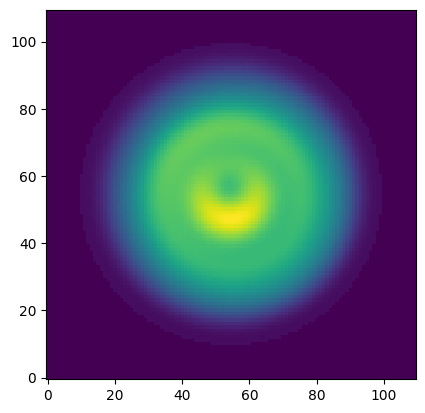

123.54302436193157
141.74854127474984


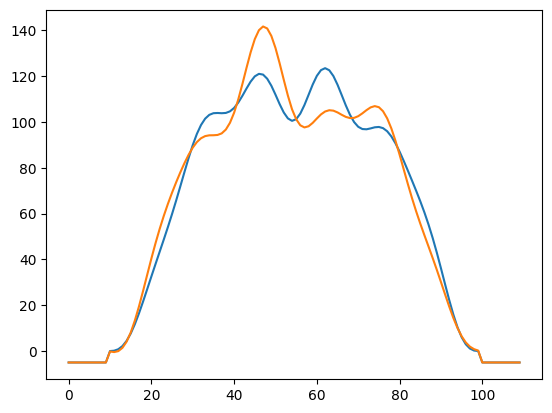

In [90]:
import numpy as np

# Auxiliary function to map polar data to a cartesian plane
def polar_to_cart(polar_data, theta_step, range_step, x, y, order=1):

    from scipy.ndimage import map_coordinates as mp

    # "x" and "y" are numpy arrays with the desired cartesian coordinates
    # we make a meshgrid with them
    X, Y = np.meshgrid(x, y)

    # Now that we have the X and Y coordinates of each point in the output plane
    # we can calculate their corresponding theta and range
    Tc = np.degrees(np.arctan2(Y, X)).ravel()
    Rc = (np.sqrt(X**2 + Y**2)).ravel()

    # Negative angles are corrected
    Tc[Tc < 0] = 360 + Tc[Tc < 0]

    # Using the known theta and range steps, the coordinates are mapped to
    # those of the data grid
    Tc = Tc / theta_step
    Rc = Rc / range_step

    # An array of polar coordinates is created stacking the previous arrays
    coords = np.vstack((Tc, Rc))

    # To avoid holes in the 360º - 0º boundary, the last column of the data
    # copied in the begining
    polar_data = np.vstack((polar_data, polar_data[-1,:]))

    # The data is mapped to the new coordinates
    # Values outside range are substituted with nans
    cart_data = mp(polar_data, coords, order=order, mode='constant', cval=-5)

    # The data is reshaped and returned
    return(cart_data.reshape(len(y), len(x)))

polar_data = emissivity_profile.T/0.459 # Here a 2D array of data is assumed, with shape thetas x ranges

# We create the x and y axes of the output cartesian data
r_eff = 0.5508001
x = dst_e.X_EMISS[0] - dst_e.MAJR[0]
y = dst_e.Y_EMISS[0]

# We call the mapping function assuming 1 degree of theta step and 500 meters of
# range step. The default order of 3 is used.
cart_data = polar_to_cart(polar_data, 3.6, r/100, x, y)
print(cart_data.shape)
plt.imshow(cart_data, origin='lower')
# invert the y coordinate 
# plt.gca().invert_yaxis()
plt.show()
plt.plot(cart_data[55, :])
plt.plot(cart_data[:, 55])
print(cart_data[55, :].max())
print(cart_data[:, 55].max())


## Differenza tra le due matrici

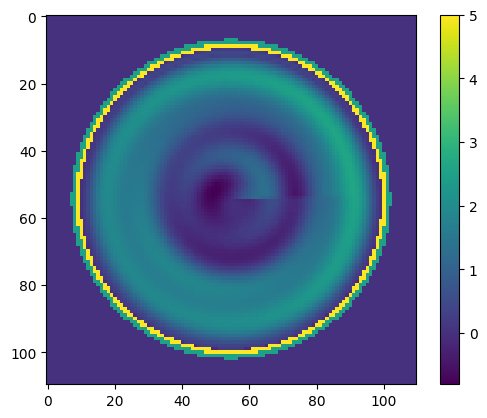

In [91]:
# print((dst_e.EMISS[0] - cart_data)/dst_e.EMISS[0].max())
positive_cart = cart_data[np.where(cart_data>=0)]
positive_dst = dst_e.EMISS[0][0][np.where(dst_e.EMISS[0][0]>=0)]
plt.imshow((dst_e.EMISS[0][0] - cart_data))
plt.colorbar()

0.02142857142857143